In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load your preprocessed dataset
df = pd.read_csv("C:\\Users\\shant\\Downloads\\quant-nasdaq-project\\data\\final_features_model_input.csv")

In [3]:
df.head()

,Close_t-1,rolling_mean_3,rolling_min_3,rolling_std_3,Volume,Close_vs_SP500,Volume_x_Volatility,DayOfWeek,IsHoliday,Close
0,0.017529,0.016777,0.014966,0.001576,0.170309,0.009024,-0.000905,3,0,0.017836
1,0.017836,0.017167,0.016138,0.000905,0.189257,-0.011752,-0.000780,4,0,0.016138
2,0.016138,0.017459,0.016138,0.001179,0.174003,-0.002275,-0.000650,1,0,0.018404
3,0.018404,0.018111,0.016138,0.001844,0.173070,0.004460,-0.000839,2,0,0.019791
4,0.019791,0.018682,0.017851,0.000999,0.194712,0.016047,-0.000768,3,0,0.017851


In [4]:
#spliit dataset
X = df.drop('Close', axis=1)
y = df['Close']

#spliit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# 1. Linear Regression Model
print("Linear Regression Model Evaluation:")
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_regressor.predict(X_test)

# Evaluate the Linear Regression Model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}")
print(f"Linear Regression - R2: {r2_lr}")
print(f"Linear Regression - MAE: {mae_lr}")

Linear Regression Model Evaluation:
Linear Regression - MSE: 3.3599328610540256e-05
Linear Regression - R2: 0.9996084160158956
Linear Regression - MAE: 0.004492207226774173


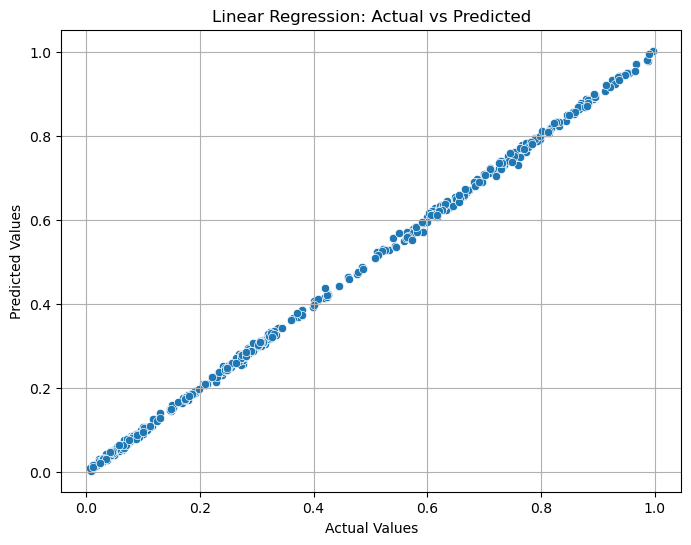

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


In [7]:
from sklearn.ensemble import RandomForestRegressor

# 2. Random Forest Model
print("Random Forest Model Evaluation:")
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}")
print(f"Random Forest - R2: {r2_rf}")
print(f"Random Forest - MAE: {mae_rf}")

Random Forest Model Evaluation:
Random Forest - MSE: 4.904251812643649e-05
Random Forest - R2: 0.9994284330838551
Random Forest - MAE: 0.0048251943400929665


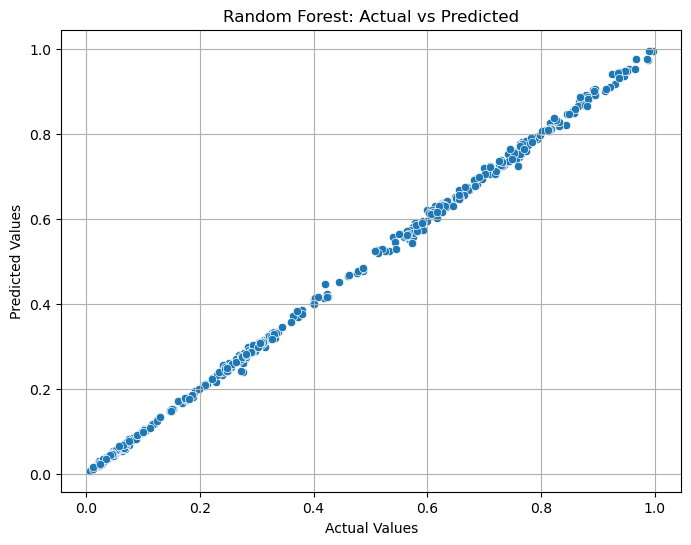

In [8]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()

In [39]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define sequence generator for LSTM
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(seq_length, len(X)):
        Xs.append(X[i-seq_length:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

# Set sequence length
SEQ_LEN = 30  # Recommended


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 3: Generate sequences
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, SEQ_LEN)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, SEQ_LEN)

# Step 4: Convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train_seq).float()
y_train_tensor = torch.from_numpy(y_train_seq).float().view(-1, 1)
X_test_tensor = torch.from_numpy(X_test_seq).float()
y_test_tensor = torch.from_numpy(y_test_seq).float().view(-1, 1)

# Step 5: Split training data into train and validation (mimicking validation_split=0.2)
val_split = 0.2
n_train = int((1 - val_split) * len(X_train_tensor))
X_train_split, X_val_split = X_train_tensor[:n_train], X_train_tensor[n_train:]
y_train_split, y_val_split = y_train_tensor[:n_train], y_train_tensor[n_train:]

# Create DataLoaders
train_dataset = TensorDataset(X_train_split, y_train_split)
val_dataset = TensorDataset(X_val_split, y_val_split)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Match Keras batch_size=32
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [40]:
# Step 6: Define LSTM model with Tanh and ReLU activations
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=256, num_layers=4, dropout_rate=0.05):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout_rate,
            batch_first=True
        )
        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(hidden_size, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        out = self.dropout(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out


# Initialize model
input_size = X_train_tensor.shape[2]
model = StockLSTM(input_size=input_size, hidden_size=128, num_layers=3, dropout_rate=0.1)

In [41]:

# Step 7: Define optimizer and loss (match Keras' Adam and MSE)
optimizer = torch.optim.Adam(model.parameters())  # Default lr=0.001 to match Keras' Adam
criterion = nn.MSELoss()

# Step 8: Training with early stopping
EPOCHS = 150  # Match Keras epochs
patience = 20  # Match Keras EarlyStopping patience
best_val_loss = float('inf')
best_model_state = None
counter = 0
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    # Training
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            epoch_val_loss += loss.item()
    avg_val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state = model.state_dict()  # Save best model weights
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

# Restore best model weights
if best_model_state is not None:
    model.load_state_dict(best_model_state)


Epoch 1/150, Train Loss: 0.1019, Val Loss: 0.0868
Epoch 2/150, Train Loss: 0.0894, Val Loss: 0.0834
Epoch 3/150, Train Loss: 0.0895, Val Loss: 0.0835
Epoch 4/150, Train Loss: 0.0887, Val Loss: 0.0838
Epoch 5/150, Train Loss: 0.0885, Val Loss: 0.0848
Epoch 6/150, Train Loss: 0.0898, Val Loss: 0.0846
Epoch 7/150, Train Loss: 0.0893, Val Loss: 0.0847
Epoch 8/150, Train Loss: 0.0874, Val Loss: 0.0849
Epoch 9/150, Train Loss: 0.0876, Val Loss: 0.0846
Epoch 10/150, Train Loss: 0.0866, Val Loss: 0.0906
Epoch 11/150, Train Loss: 0.0865, Val Loss: 0.0859
Epoch 12/150, Train Loss: 0.0857, Val Loss: 0.0898
Epoch 13/150, Train Loss: 0.0852, Val Loss: 0.0941
Epoch 14/150, Train Loss: 0.0836, Val Loss: 0.0924
Epoch 15/150, Train Loss: 0.0821, Val Loss: 0.0928
Epoch 16/150, Train Loss: 0.0808, Val Loss: 0.0933
Epoch 17/150, Train Loss: 0.0789, Val Loss: 0.0914
Epoch 18/150, Train Loss: 0.0759, Val Loss: 0.0969
Epoch 19/150, Train Loss: 0.0758, Val Loss: 0.1029
Epoch 20/150, Train Loss: 0.0750, Val Lo

In [42]:

# Step 9: Evaluate on test set
model.eval()
y_preds = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        preds = model(X_batch)
        y_preds.append(preds.numpy())
y_pred_lstm = np.vstack(y_preds).flatten()  # Flatten to match Keras y_pred
y_true_lstm = y_test_tensor.numpy().flatten()

mse_lstm = mean_squared_error(y_true_lstm, y_pred_lstm)
r2_lstm = r2_score(y_true_lstm, y_pred_lstm)

print(f"LSTM Model - MSE: {mse_lstm:.4f}")
print(f"LSTM Model - R2: {r2_lstm:.4f}")



LSTM Model - MSE: 0.0964
LSTM Model - R2: -0.1503


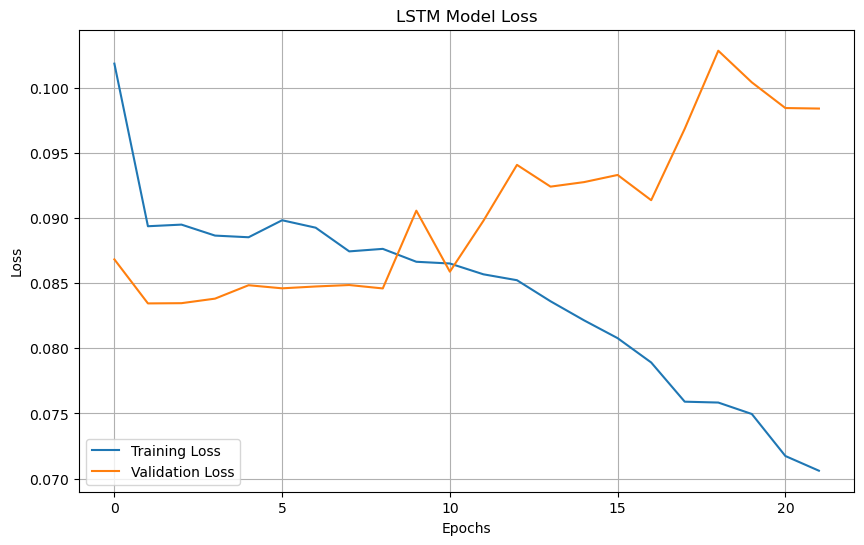

In [43]:

# Step 10: Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


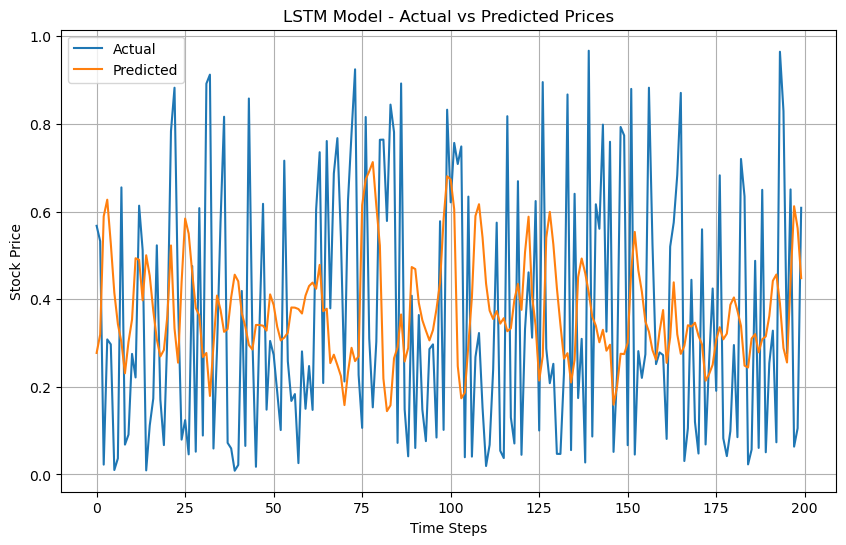

In [44]:

# Optional: Plot actual vs predicted (retaining original visualization)
plt.figure(figsize=(10, 6))
plt.plot(y_true_lstm[:200], label='Actual')
plt.plot(y_pred_lstm[:200], label='Predicted')
plt.title("LSTM Model - Actual vs Predicted Prices")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
class StockGRU(nn.Module):
    def __init__(self, input_size, hidden_size=256, num_layers=4, dropout_rate=0.05):
        super(StockGRU, self).__init__()
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout_rate,
            batch_first=True
        )
        self.dropout = nn.Dropout(dropout_rate)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(hidden_size, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]
        out = self.dropout(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

# Instantiate model
model_gru = StockGRU(input_size=input_size)


In [46]:
# Step 9: Evaluate on test set
# To use GRU:
model = model_gru

model.eval()
y_preds = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        preds = model(X_batch)
        y_preds.append(preds.numpy())

y_pred_model = np.vstack(y_preds).flatten()
y_true_model = y_test_tensor.numpy().flatten()

mse_model = mean_squared_error(y_true_model, y_pred_model)
r2_model = r2_score(y_true_model, y_pred_model)
mae_model = mean_absolute_error(y_true_model, y_pred_model)

print(f"Model - MSE: {mse_model:.4f}")
print(f"Model - MAE: {mae_model:.4f}")
print(f"Model - R2 Score: {r2_model:.4f}")


Model - MSE: 0.2560
Model - MAE: 0.4149
Model - R2 Score: -2.0543


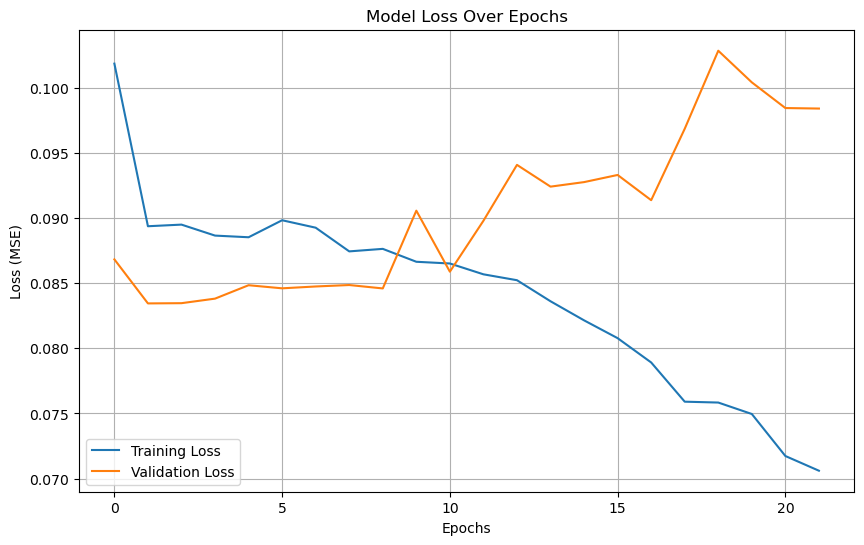

In [47]:
# Step 10: Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


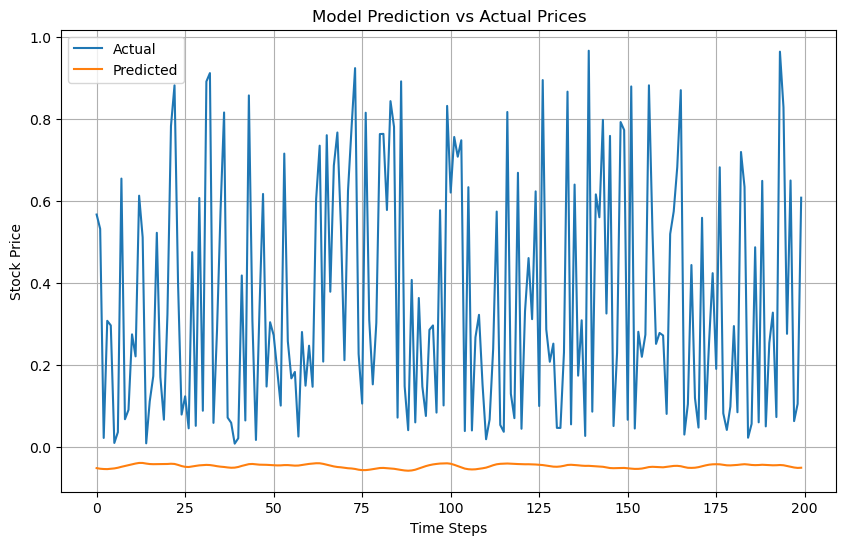

In [48]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_true_model[:200], label='Actual')
plt.plot(y_pred_model[:200], label='Predicted')
plt.title("Model Prediction vs Actual Prices")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
class StockCNNLSTM(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, dropout_rate=0.2):
        super(StockCNNLSTM, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        
        self.lstm = nn.LSTM(
            input_size=64,  # Output of conv1
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_rate
        )

        self.dropout = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(hidden_size, 32)
        self.relu2 = nn.ReLU()
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        # CNN expects (batch, channels, sequence_len), so transpose
        x = x.transpose(1, 2)
        x = self.pool(self.relu1(self.conv1(x)))
        x = x.transpose(1, 2)  # Back to (batch, seq_len, channels)
        
        lstm_out, _ = self.lstm(x)
        out = lstm_out[:, -1, :]
        out = self.dropout(out)
        out = self.relu2(self.fc1(out))
        out = self.fc2(out)
        return out

# Instantiate
model_cnnlstm = StockCNNLSTM(input_size=input_size)


In [25]:
# Step 9: Evaluate on test set
# To use GRU:
model = model_cnnlstm

model.eval()
y_preds = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        preds = model(X_batch)
        y_preds.append(preds.numpy())

y_pred_model = np.vstack(y_preds).flatten()
y_true_model = y_test_tensor.numpy().flatten()

mse_model = mean_squared_error(y_true_model, y_pred_model)
r2_model = r2_score(y_true_model, y_pred_model)
mae_model = mean_absolute_error(y_true_model, y_pred_model)

print(f"Model - MSE: {mse_model:.4f}")
print(f"Model - MAE: {mae_model:.4f}")
print(f"Model - R2 Score: {r2_model:.4f}")


Model - MSE: 0.2719
Model - MAE: 0.4316
Model - R2 Score: -2.1741


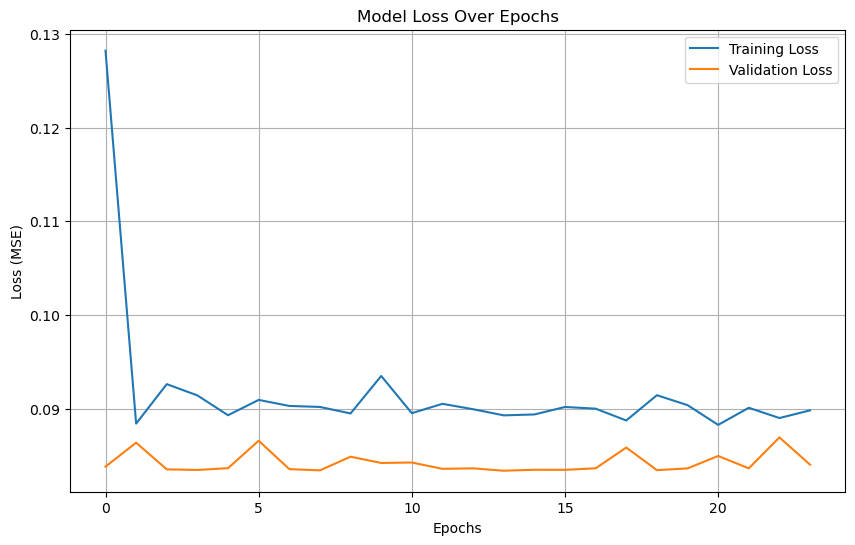

In [26]:
# Step 10: Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


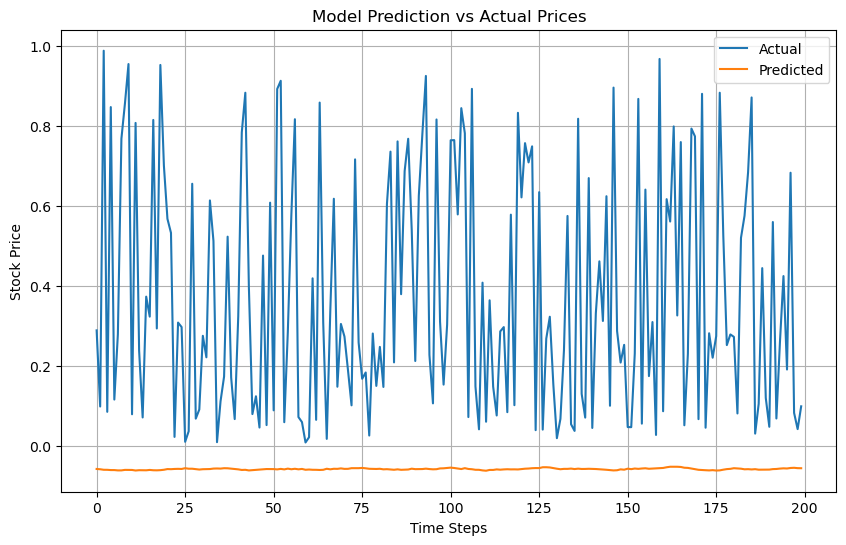

In [27]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_true_model[:200], label='Actual')
plt.plot(y_pred_model[:200], label='Predicted')
plt.title("Model Prediction vs Actual Prices")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'LSTM', 'GRU', 'CNN-LSTM'],
    'MSE': [mse_lr, mse_rf, mse_lstm, mse_model, mse_model],
    'MAE': [mae_lr, mae_rf, mean_absolute_error(y_true_lstm, y_pred_lstm), mae_model, mae_model],
    'R2 Score': [r2_lr, r2_rf, r2_lstm, r2_model, r2_model]
})

print(results)


               Model       MSE       MAE  R2 Score
0  Linear Regression  0.000034  0.004492  0.999608
1      Random Forest  0.000049  0.004825  0.999428
2               LSTM  0.085689  0.258551 -0.000296
3                GRU  0.271908  0.431618 -2.174128
4           CNN-LSTM  0.271908  0.431618 -2.174128


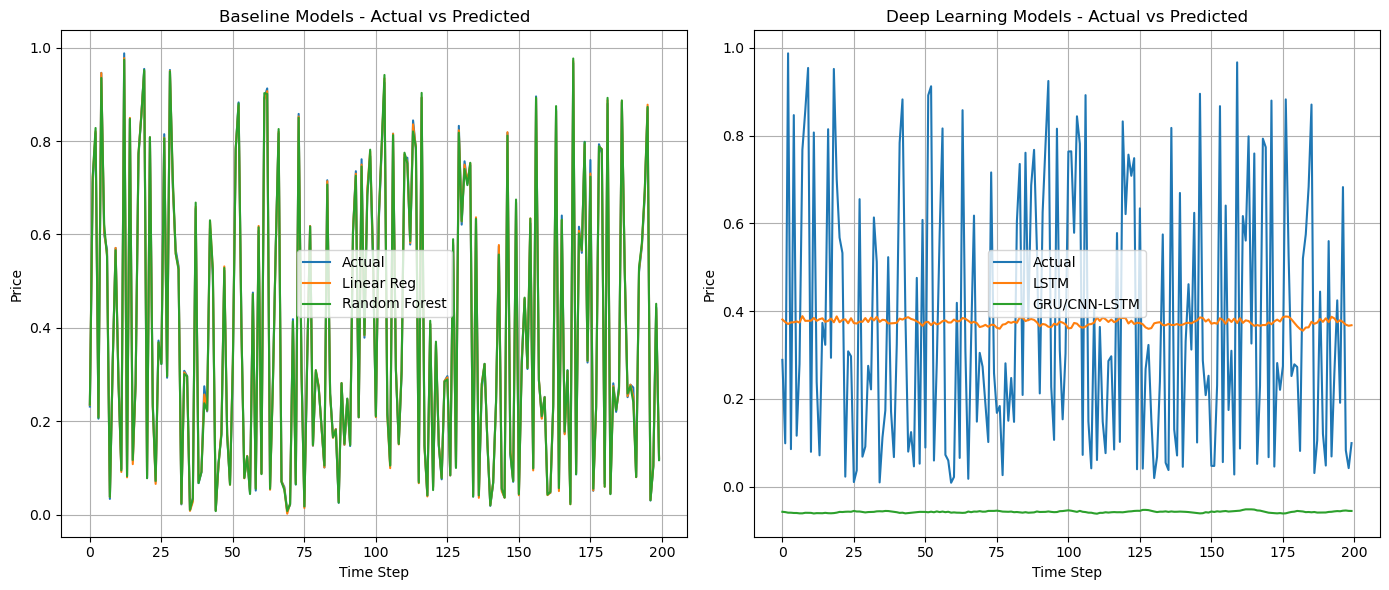

In [29]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred_lr[:200], label='Linear Reg')
plt.plot(y_pred_rf[:200], label='Random Forest')
plt.title("Baseline Models - Actual vs Predicted")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(y_true_lstm[:200], label='Actual')
plt.plot(y_pred_lstm[:200], label='LSTM')
plt.plot(y_pred_model[:200], label='GRU/CNN-LSTM')  # Change label if needed
plt.title("Deep Learning Models - Actual vs Predicted")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


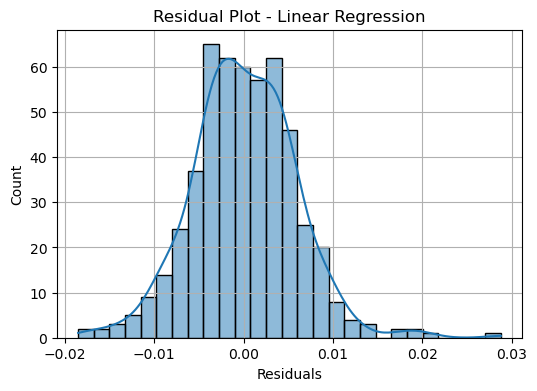

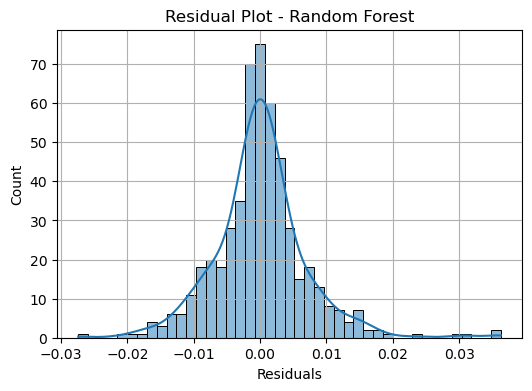

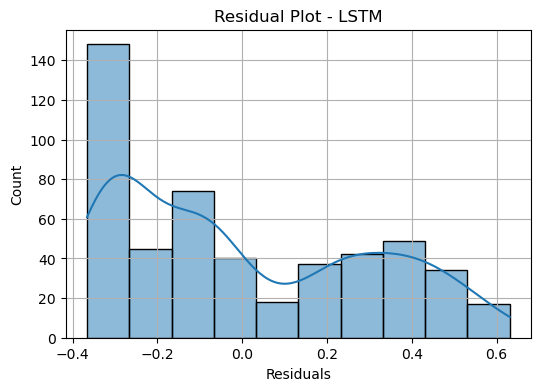

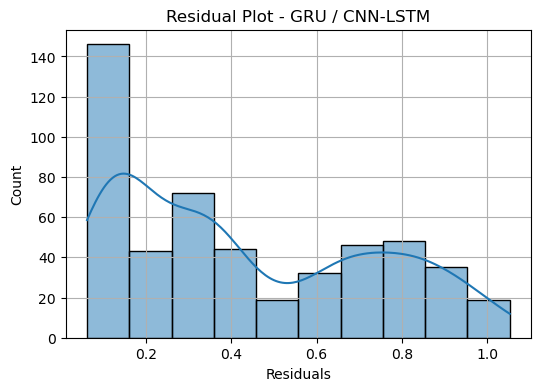

In [30]:
from sklearn.metrics import mean_absolute_error

def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residual Plot - {title}')
    plt.xlabel('Residuals')
    plt.grid(True)
    plt.show()

# Residuals for all
plot_residuals(y_test, y_pred_lr, "Linear Regression")
plot_residuals(y_test, y_pred_rf, "Random Forest")
plot_residuals(y_true_lstm, y_pred_lstm, "LSTM")
plot_residuals(y_true_model, y_pred_model, "GRU / CNN-LSTM")


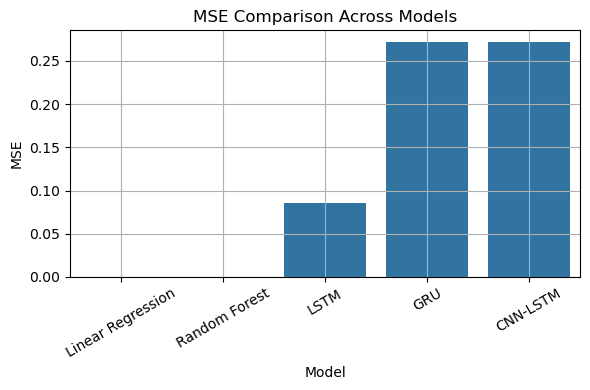

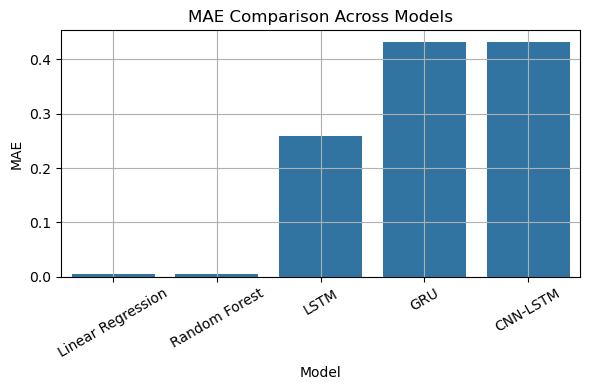

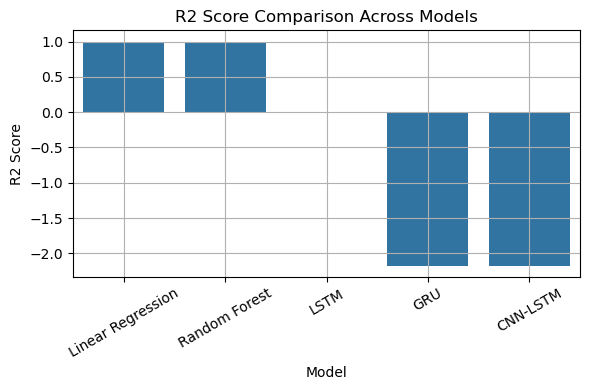

In [31]:
metrics = ['MSE', 'MAE', 'R2 Score']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=results, x='Model', y=metric)
    plt.title(f'{metric} Comparison Across Models')
    plt.xticks(rotation=30)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [32]:
# Compare Linear Regression and Random Forest
base_models = results.loc[:1]  # First two rows
best_base = base_models.loc[base_models['MAE'].idxmin()]

print("Best Baseline Model:")
print(best_base)


Best Baseline Model:
Model       Linear Regression
MSE                  0.000034
MAE                  0.004492
R2 Score             0.999608
Name: 0, dtype: object
